In [4]:
###tencent hr jobs wc

import jieba
from os import path
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import jieba.analyse
from wordcloud import WordCloud, STOPWORDS

In [5]:
lines=open('../tencentjob.csv').readlines() 
#分词
jieba.analyse.set_stop_words("../jieba/stop.txt")
#停用词list，去除时候用
stoplist = {}.fromkeys([ line.strip('\n') for line in open("../jieba/stop.txt") ])  


In [6]:
##分词文件输出
with open('tencentjob_seg_words.txt', 'w') as f:
    for line in lines:
        seg_list = jieba.cut(line, cut_all=False)# 精确模式
        #消除停用词
        segs = [word for word in list(seg_list) if word not in stoplist]  
        seg_line = " ".join(segs)  
        f.write(''.join( seg_line ))

Building prefix dict from the default dictionary ...
Dumping model to file cache /tmp/jieba.cache
Loading model cost 1.229 seconds.
Prefix dict has been built succesfully.


In [7]:
#关键词抽取
content = open('../tencentjob.csv', 'rb').read()
tags = jieba.analyse.extract_tags(content, topK=100)
print(",".join(tags))


tencent,游戏,运营,产品,开发,项目,设计,技术类,腾讯,用户,本科,平台,行业,互联网,数据分析,数据,策划,技术,算法,学习,需求,内容,系统,C++,工程师,精通,管理,流程,后台,架构,测试,制定,研发,责任心,抗压,广告,资源,优秀,熟练,较强,微信,协调,客户,方案,Linux,编程,视频,解决方案,经理,熟练掌握,策略,手游,IP,北京,提升,数据库,美术,服务,活动,网络,产品策划,工具,架构设计,框架,客户端,高级,项目管理,维护,运维,场景,营销,渠道,数据挖掘,市场,QQ,文档,商业化,挖掘,建设,计算机,公司,社交,精神,研究,Android,3D,计算机相关,独立,软件,模块,效果,扎实,至少,目标,数据结构,Web,版本,推广,拓展,Python


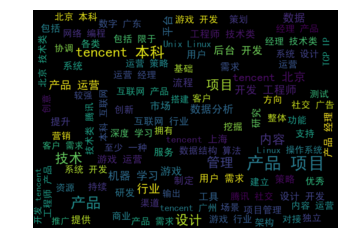

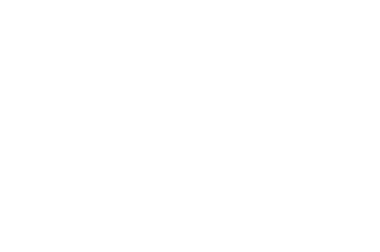

In [8]:
#word cloud
d = path.dirname('__file__')

# Read the whole text.
text = open(path.join(d, 'tencentjob_seg_words.txt')).read()

stopwords = set(STOPWORDS)
#可以加一些过滤词

#中文字体要单独弄
wc = WordCloud(font_path='/usr/share/fonts//simhei.ttf',\
               width=700, height=500,\
               background_color="black", max_words=100,min_font_size=10,max_font_size=40,stopwords=stopwords)
# generate word cloud
wc.generate(text)

# store to file
wc.to_file(path.join(d, "jobs-hotwords.png"))

# show
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.figure()
plt.axis("off")
plt.show()